In [2]:
import numpy as np
import pandas as pd

import urllib.request as url 

from bs4 import BeautifulSoup

from wordcloud import WordCloud
import requests
import re
import ssl
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(1994)

from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import os
#import json
#import itertools as it
#from typing import List, Dict

#import requests
#from requests import get
#from bs4 import BeautifulSoup
#import pandas as pd
#import urllib.parse

In [ ]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [ ]:
a_authors_list = 'https://www.gutenberg.org/browse/authors/a'
url = a_authors_list
print(f"Opening the file connection to {url}")
html = urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')
print("Connection established and HTML parsed...")

In [ ]:
# Empty list to hold all the http links in the HTML page
all_links=[]

# Find all the href tags and store them in the list of links
for link in soup.find_all('a', attrs={'href': re.compile("^/ebooks/")}):
    #print(link.get('href'))
    all_links.append(link.get('href'))

In [ ]:
all_links[3000:4000]

In [ ]:
len(all_links)

In [ ]:
soup

### Abbott, John S. C. (John Stevens Cabot) Book Numbers

In [ ]:
# Initialize empty list to hold the file numbers
a1298_booknum=[]

for i in range(126,156):
    link=all_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        a1298_booknum.append(int(n[0]))

print ("\nThe file numbers for the Abbott, John S. C. (John Stevens Cabot), 1805-1877 are shown below\n"+"-"*100)
print(a1298_booknum)
print ("\nTotal Numbers of books\n"+"-"*25)
print(len(a1298_booknum))

### Ainsworth, William Harrison Book Numbers

### Aldrich, Thomas Bailey  Book Numbers

### Alger, Horatio, Jr., Book Numbers

In [ ]:
a168_booknum=[]

for i in range(1054,1166):
    link=all_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        a168_booknum.append(int(n[0]))

print ("\nThe file numbers for the Alger, Horatio, Jr., 1832-1899 are shown below\n"+"-"*70)
print(a168_booknum)
print ("\nTotal Numbers of books\n"+"-"*25)
print(len(a168_booknum))

### Altsheler, Joseph A. (Joseph Alexander) Book Numbers

In [ ]:
a2561_booknum=[]

for i in range(1468,1502):
    link=all_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        a2561_booknum.append(int(n[0]))

print ("\nThe file numbers for the Altsheler, Joseph A. (Joseph Alexander), 1862-1919  are shown below\n"+"-"*90)
print(a2561_booknum)
print ("\nTotal Numbers of books\n"+"-"*25)
print(len(a2561_booknum))

### Arthur, T. S. (Timothy Shay)  Book Numbers

In [ ]:
a1513_booknum=[]

for i in range(3104,3138):
    link=all_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        a1513_booknum.append(int(n[0]))

print ("\nThe file numbers for the Arthur, T. S. (Timothy Shay), 1809-1885 are shown below\n"+"-"*80)
print(a1513_booknum)
print ("\nTotal Numbers of books\n"+"-"*25)
print(len(a1513_booknum))

### Atherton, Gertrude Franklin Horn Book Numbers

In [ ]:
a263_booknum=[]

for i in range(3314,3340):
    link=all_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        a263_booknum.append(int(n[0]))

print ("\nThe file numbers for the Atherton, Gertrude Franklin Horn, 1857-1948 are shown below\n"+"-"*70)
print(a263_booknum)
print ("\nTotal Numbers of books\n"+"-"*25)
print(len(a263_booknum))

In [ ]:
def extract_web(link):
    html_page = urlopen(link).read()
    soup = BeautifulSoup(html_page)
    d = {'title':[],'links':[]}
    for link in soup.find_all('a', attrs={'href': re.compile("^/ebooks/")}):
        d['links'].append(link['href'])
        d['title'].append(link.text)
        #d['author'].get('href')
        
    return d

In [ ]:
d = extract_web("https://www.gutenberg.org/browse/authors/a")

books_list = pd.DataFrame(d)

In [ ]:
books_list.head()

In [ ]:
books_list.shape

### Extract the 20 Links from each author

In [ ]:
# Abbott, John S. C. (John Stevens Cabot), 1805-1877

#a1298 = books_list.iloc[126:156]
a1298 = books_list.iloc[126:146]

In [ ]:
# Alger, Horatio, Jr., 1832-1899 ¶

#a168 = books_list.iloc[1054:1166]
a168 = books_list.iloc[1054:1074]

In [ ]:
# Altsheler, Joseph A. (Joseph Alexander)

#a2561 = books_list.iloc[1468:1502]
a2561 = books_list.iloc[1468:1488]

In [ ]:
# Arthur, T. S. (Timothy Shay)

#a1513 = books_list.iloc[3104:3138]
a1513 = books_list.iloc[3104:3124]

In [ ]:
# Atherton, Gertrude Franklin Horn

#a263 = books_list.iloc[3314:3340]
a263 = books_list.iloc[3314:3334]

### combine all the data into one frame

In [ ]:
train_data = pd.concat([a1298,a168,a2561,a1513,a263])
train_data = train_data.reset_index(drop=True)

In [ ]:
train_data.tail()

In [ ]:
train_data.shape

In [ ]:
def func(text):
    return re.sub(r'^/','https://www.gutenberg.org/', text)

train_data['links']= train_data['links'].apply(func)

In [ ]:
def textlink(links):
    text = []
    for url in links:
        reqs = urlopen(url).read()
        soup = BeautifulSoup(reqs)
        for link in soup.find_all('a', attrs={'href': re.compile(".txt.utf-8$|.txt$")}):
            text.append(link['href'])
            print(text)
    return text

In [ ]:
%%time
tx = textlink(train_data['links'])

In [ ]:
tx = pd.DataFrame(tx)

In [ ]:
len(tx)

In [ ]:
train_data['textlink'] = tx

In [ ]:
train_data['textlink']= train_data['textlink'].apply(func)

In [ ]:
%%time
loc = []
for url in train_data['textlink']:
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'lxml')
    print("Text from the said page:")
    loc.append(soup.get_text())
    print(loc)

In [ ]:
train_data['text'] = loc

In [ ]:
train_data.head()

### Create Target Variable

In [ ]:
train_data['Author'] = ['Abbott, John S. C. (John Stevens Cabot), 1805-1877']*20+['Alger, Horatio, Jr., 1832-1899']*20+['Altsheler, Joseph A. (Joseph Alexander), 1862-1919']*20 + ['Arthur, T. S. (Timothy Shay), 1809-1885']*20 + ['Atherton, Gertrude Franklin Horn, 1857-1948']*20
train_data.head()

In [ ]:
train_data.shape

In [11]:
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
%matplotlib inline

import spacy
nlp = spacy.load("en_core_web_sm")

import string

In [4]:
data = pd.read_csv("Extracted_Articles.csv", sep= ',')
data.head()

,title,link,textlink,text,Author
0,The Adventures of the Chevalier De La Salle an...,NaN,https://www.gutenberg.org/ebooks/24400.txt.utf-8,The Project Gutenberg EBook of The Adventures ...,"Abbott, John S. C. (John Stevens Cabot), 1805-..."
1,Benjamin Franklin\rA Picture of the Struggles ...,NaN,https://www.gutenberg.org/ebooks/30406.txt.utf-8,The Project Gutenberg EBook of Benjamin Frankl...,"Abbott, John S. C. (John Stevens Cabot), 1805-..."
2,Captain William Kidd and Others of the Buccaneers,NaN,https://www.gutenberg.org/files/50550/50550-0.txt,"The Project Gutenberg eBook, Captain William K...","Abbott, John S. C. (John Stevens Cabot), 1805-..."
3,The Child at Home: The Principles of Filial Du...,NaN,https://www.gutenberg.org/ebooks/18533.txt.utf-8,The Project Gutenberg EBook of The Child at Ho...,"Abbott, John S. C. (John Stevens Cabot), 1805-..."
4,"Christopher Carson, Familiarly Known as Kit Ca...",NaN,https://www.gutenberg.org/ebooks/14243.txt.utf-8,"The Project Gutenberg eBook, Christopher Carso...","Abbott, John S. C. (John Stevens Cabot), 1805-..."


In [5]:
data.iloc[0,3]

'The Project Gutenberg EBook of The Adventures of the Chevalier De La Salle\r\nand His Companions, in Their Explorations of the Prairies, Forests, Lakes, and Rivers, of the New World, and Their Interviews with the Savage Tribes, Two Hundred Years Ago, by John S. C. Abbott\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: The Adventures of the Chevalier De La Salle and His Companions, in Their Explorations of the Prairies, Forests, Lakes, and Rivers, of the New World, and Their Interviews with the Savage Tribes, Two Hundred Years Ago\r\n\r\nAuthor: John S. C. Abbott\r\n\r\nRelease Date: January 22, 2008 [EBook #24400]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK ADVENTURES OF THE CHEVALIER DE LA SALLE ***\r\n\r\n\r\n\r\n\r\nP

In [6]:
books = data.text

In [7]:
books.shape

(100,)

In [8]:
books[1]

'The Project Gutenberg EBook of Benjamin Franklin, A Picture of the\r\nStruggles of Our Infant Nation One Hundred Years Ago, by John S. C. Abbott\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: Benjamin Franklin, A Picture of the Struggles of Our Infant Nation One Hundred Years Ago\r\n       American Pioneers and Patriots Series\r\n\r\nAuthor: John S. C. Abbott\r\n\r\nRelease Date: November 5, 2009 [EBook #30406]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK BENJAMIN FRANKLIN ***\r\n\r\n\r\n\r\n\r\nProduced by D Alexander and the Online Distributed\r\nProofreading Team at http://www.pgdp.net (This file was\r\nproduced from images generously made available by The\r\nInternet Archive)\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n_A

In [ ]:
ax = train_data['Author'].value_counts().plot('bar')
ax.set_title('Number of Articles by each Author\n')
ax.set_xlabel('Authors')
ax.set_ylabel('Number of Articles')

## Text Preprocessing Steps

In [9]:
def remove_features(data_str): # compile regex
    url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?') 
    punc_re = re.compile('[%s]' % re.escape(string.punctuation)) 
    num_re = re.compile('(\\d+)')
    mention_re = re.compile('@(\w+)')
    alpha_num_re = re.compile("^[a-z0-9_.]+$")
    # Remove
    data_str = data_str.replace('\r', ' ').replace('\n', ' ')
    # convert to lowercase
    data_str = data_str.lower()
    # remove hyperlinks
    data_str = url_re.sub(' ', data_str)
    # remove @mentions
    data_str = mention_re.sub(' ', data_str)
    # remove puncuation
    data_str = punc_re.sub(' ', data_str)
    # remove numeric 'words'
    data_str = num_re.sub(' ', data_str)
    # Remove extra spaces from the text
    data_str = re.sub("\s+", ' ', data_str)
    # remove non a-z 0-9 characters and words shorter than 2 characters 
    list_pos = 0
    cleaned_str = ''
    for word in data_str.split():
        if list_pos == 0:
            if alpha_num_re.match(word) and len(word) > 2:
                cleaned_str = word 
            else:
                cleaned_str = ' '
        else:
            if alpha_num_re.match(word) and len(word) > 2:
                cleaned_str = cleaned_str + ' ' + word 
            else:
                cleaned_str += ' '
        list_pos += 1
    
    return " ".join(cleaned_str.split())

In [12]:
clean_books = []
for i in range(len(books)):
    book_i = remove_features(books[i])
    clean_books.append(book_i)

In [13]:
clean_books[1]

'the project gutenberg ebook benjamin franklin picture the struggles our infant nation one hundred years ago john abbott this ebook for the use anyone anywhere cost and with almost restrictions whatsoever you may copy give away use under the terms the project gutenberg license included with this ebook online www gutenberg net title benjamin franklin picture the struggles our infant nation one hundred years ago american pioneers and patriots series author john abbott release date november ebook language english start this project gutenberg ebook benjamin franklin produced alexander and the online distributed proofreading team this file was produced from images generously made available the internet archive american pioneers and patriots benjamin franklin picture the struggles our infant nation one hundred years ago john abbott print cromwell illustrated new york dodd mead company broadway copyright dodd mead company preface next george washington must write upon the catalogue american p

In [14]:
data['clean_books'] = clean_books

In [15]:
data.shape

(100, 6)

###  Handling contractions 

In [16]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [17]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

In [18]:
data['clean_books'] = [expand_contractions(re.sub('’', "'", text)) for text in data['clean_books']]
data['clean_books'][1]

'the project gutenberg ebook benjamin franklin picture the struggles our infant nation one hundred years ago john abbott this ebook for the use anyone anywhere cost and with almost restrictions whatsoever you may copy give away use under the terms the project gutenberg license included with this ebook online www gutenberg net title benjamin franklin picture the struggles our infant nation one hundred years ago american pioneers and patriots series author john abbott release date november ebook language english start this project gutenberg ebook benjamin franklin produced alexander and the online distributed proofreading team this file was produced from images generously made available the internet archive american pioneers and patriots benjamin franklin picture the struggles our infant nation one hundred years ago john abbott print cromwell illustrated new york dodd mead company broadway copyright dodd mead company preface next george washington must write upon the catalogue american p

#### Adding new column "word_count" which specifies the number of tokens in each document

In [19]:
data['word_count'] = [len(text.split(' ')) for text in data['clean_books']]
pd.DataFrame(data['word_count']).describe()

,word_count
count,100.000000
mean,63843.260000
std,34041.279017
min,9513.000000
25%,41752.750000
50%,57807.500000
75%,72475.750000
max,175724.000000


In [20]:
data.keys()

Index(['title', 'link', 'textlink', 'text', 'Author', 'clean_books',
       'word_count'],
      dtype='object')

In [26]:
blogs_df = pd.DataFrame(data)
print("Shape: ",blogs_df.shape)
blogs_df.head(5)

Shape:  (100, 7)


,title,link,textlink,text,Author,clean_books,word_count
0,The Adventures of the Chevalier De La Salle an...,NaN,https://www.gutenberg.org/ebooks/24400.txt.utf-8,The Project Gutenberg EBook of The Adventures ...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the adventures the...,69458
1,Benjamin Franklin\rA Picture of the Struggles ...,NaN,https://www.gutenberg.org/ebooks/30406.txt.utf-8,The Project Gutenberg EBook of Benjamin Frankl...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook benjamin franklin ...,66179
2,Captain William Kidd and Others of the Buccaneers,NaN,https://www.gutenberg.org/files/50550/50550-0.txt,"The Project Gutenberg eBook, Captain William K...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook captain william ki...,67865
3,The Child at Home: The Principles of Filial Du...,NaN,https://www.gutenberg.org/ebooks/18533.txt.utf-8,The Project Gutenberg EBook of The Child at Ho...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the child home joh...,36466
4,"Christopher Carson, Familiarly Known as Kit Ca...",NaN,https://www.gutenberg.org/ebooks/14243.txt.utf-8,"The Project Gutenberg eBook, Christopher Carso...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook christopher carson...,63723


#### Converting dataframe back to dictionary

In [28]:
data = blogs_df.reset_index().to_dict(orient='list')
print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'title', 'link', 'textlink', 'text', 'Author', 'clean_books', 'word_count'])


In [29]:
type(data['clean_books'])

list

### Stopwords, stemming, and tokenizing

In [21]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
stopwords.remove('no')
stopwords.remove('not')

Number of stop words: 326
First ten stop words: ['us', 'those', 'already', 'your', 'become', 'there', 'only', 'throughout', 'per', 'everyone']


In [22]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [23]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [31]:
nlp.max_length = 1500000

In [32]:
%%time
## We are trying to create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []

vocab_stemmed = []
allvocab_stemmed =[]

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['clean_books']):

    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    vocab_stemmed.extend(words_stemmed)
    data['clean_text_stemmed'].append(words_stemmed)
        
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_lemmatized.extend(words_lemmatized)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
       
    allwords_stemmed = tokenize_and_stem(doc, False)
    allvocab_stemmed.extend(allwords_stemmed)
    data['text_stemmed'].append(allwords_stemmed)
    
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

In [33]:
pd.DataFrame(data).head(6)

,index,title,link,textlink,text,Author,clean_books,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized
0,0,The Adventures of the Chevalier De La Salle an...,NaN,https://www.gutenberg.org/ebooks/24400.txt.utf-8,The Project Gutenberg EBook of The Adventures ...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the adventures the...,69458,"[project, gutenberg, ebook, adventur, chevali,...","[project, gutenberg, ebook, adventure, chevali...","[the, project, gutenberg, ebook, the, adventur...","[the, project, gutenberg, ebook, the, adventur..."
1,1,Benjamin Franklin\rA Picture of the Struggles ...,NaN,https://www.gutenberg.org/ebooks/30406.txt.utf-8,The Project Gutenberg EBook of Benjamin Frankl...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook benjamin franklin ...,66179,"[project, gutenberg, ebook, benjamin, franklin...","[project, gutenberg, ebook, benjamin, franklin...","[the, project, gutenberg, ebook, benjamin, fra...","[the, project, gutenberg, ebook, benjamin, fra..."
2,2,Captain William Kidd and Others of the Buccaneers,NaN,https://www.gutenberg.org/files/50550/50550-0.txt,"The Project Gutenberg eBook, Captain William K...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook captain william ki...,67865,"[project, gutenberg, ebook, captain, william, ...","[project, gutenberg, ebook, captain, william, ...","[the, project, gutenberg, ebook, captain, will...","[the, project, gutenberg, ebook, captain, will..."
3,3,The Child at Home: The Principles of Filial Du...,NaN,https://www.gutenberg.org/ebooks/18533.txt.utf-8,The Project Gutenberg EBook of The Child at Ho...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the child home joh...,36466,"[project, gutenberg, ebook, child, home, john,...","[project, gutenberg, ebook, child, home, john,...","[the, project, gutenberg, ebook, the, child, h...","[the, project, gutenberg, ebook, the, child, h..."
4,4,"Christopher Carson, Familiarly Known as Kit Ca...",NaN,https://www.gutenberg.org/ebooks/14243.txt.utf-8,"The Project Gutenberg eBook, Christopher Carso...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook christopher carson...,63723,"[project, gutenberg, ebook, christoph, carson,...","[project, gutenberg, ebook, christopher, carso...","[the, project, gutenberg, ebook, christoph, ca...","[the, project, gutenberg, ebook, christopher, ..."
5,5,Columbus: De ontdekker van Amerika,NaN,https://www.gutenberg.org/ebooks/18066.txt.utf-8,"The Project Gutenberg EBook of Columbus, by J....","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook columbus abbott th...,56525,"[project, gutenberg, ebook, columbus, abbott, ...","[project, gutenberg, ebook, columbus, abbott, ...","[the, project, gutenberg, ebook, columbus, abb...","[the, project, gutenberg, ebook, columbus, abb..."


In [34]:
all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 6387026 items in all_vocab_frame
there are 3422516 items in vocab_frame


In [35]:
print (vocab_frame.head(20))

                    words
project           project
gutenberg       gutenberg
ebook               ebook
adventure      adventures
chevalier       chevalier
salle               salle
companion      companions
exploration  explorations
prairie          prairies
forest            forests
lake                lakes
river              rivers
new                   new
world               world
interview      interviews
savage             savage
tribe              tribes
year                years
ago                   ago
john                 john


### Plotting Most frequent words before and after stopword reAmoval

In [36]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

In [37]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[43769 30898 50773 ... 45677  7180 40360]
[50534  1925 56501 ... 36242  7024 22696]


In [38]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### Frequency plot of words in blogs with stopwords removed

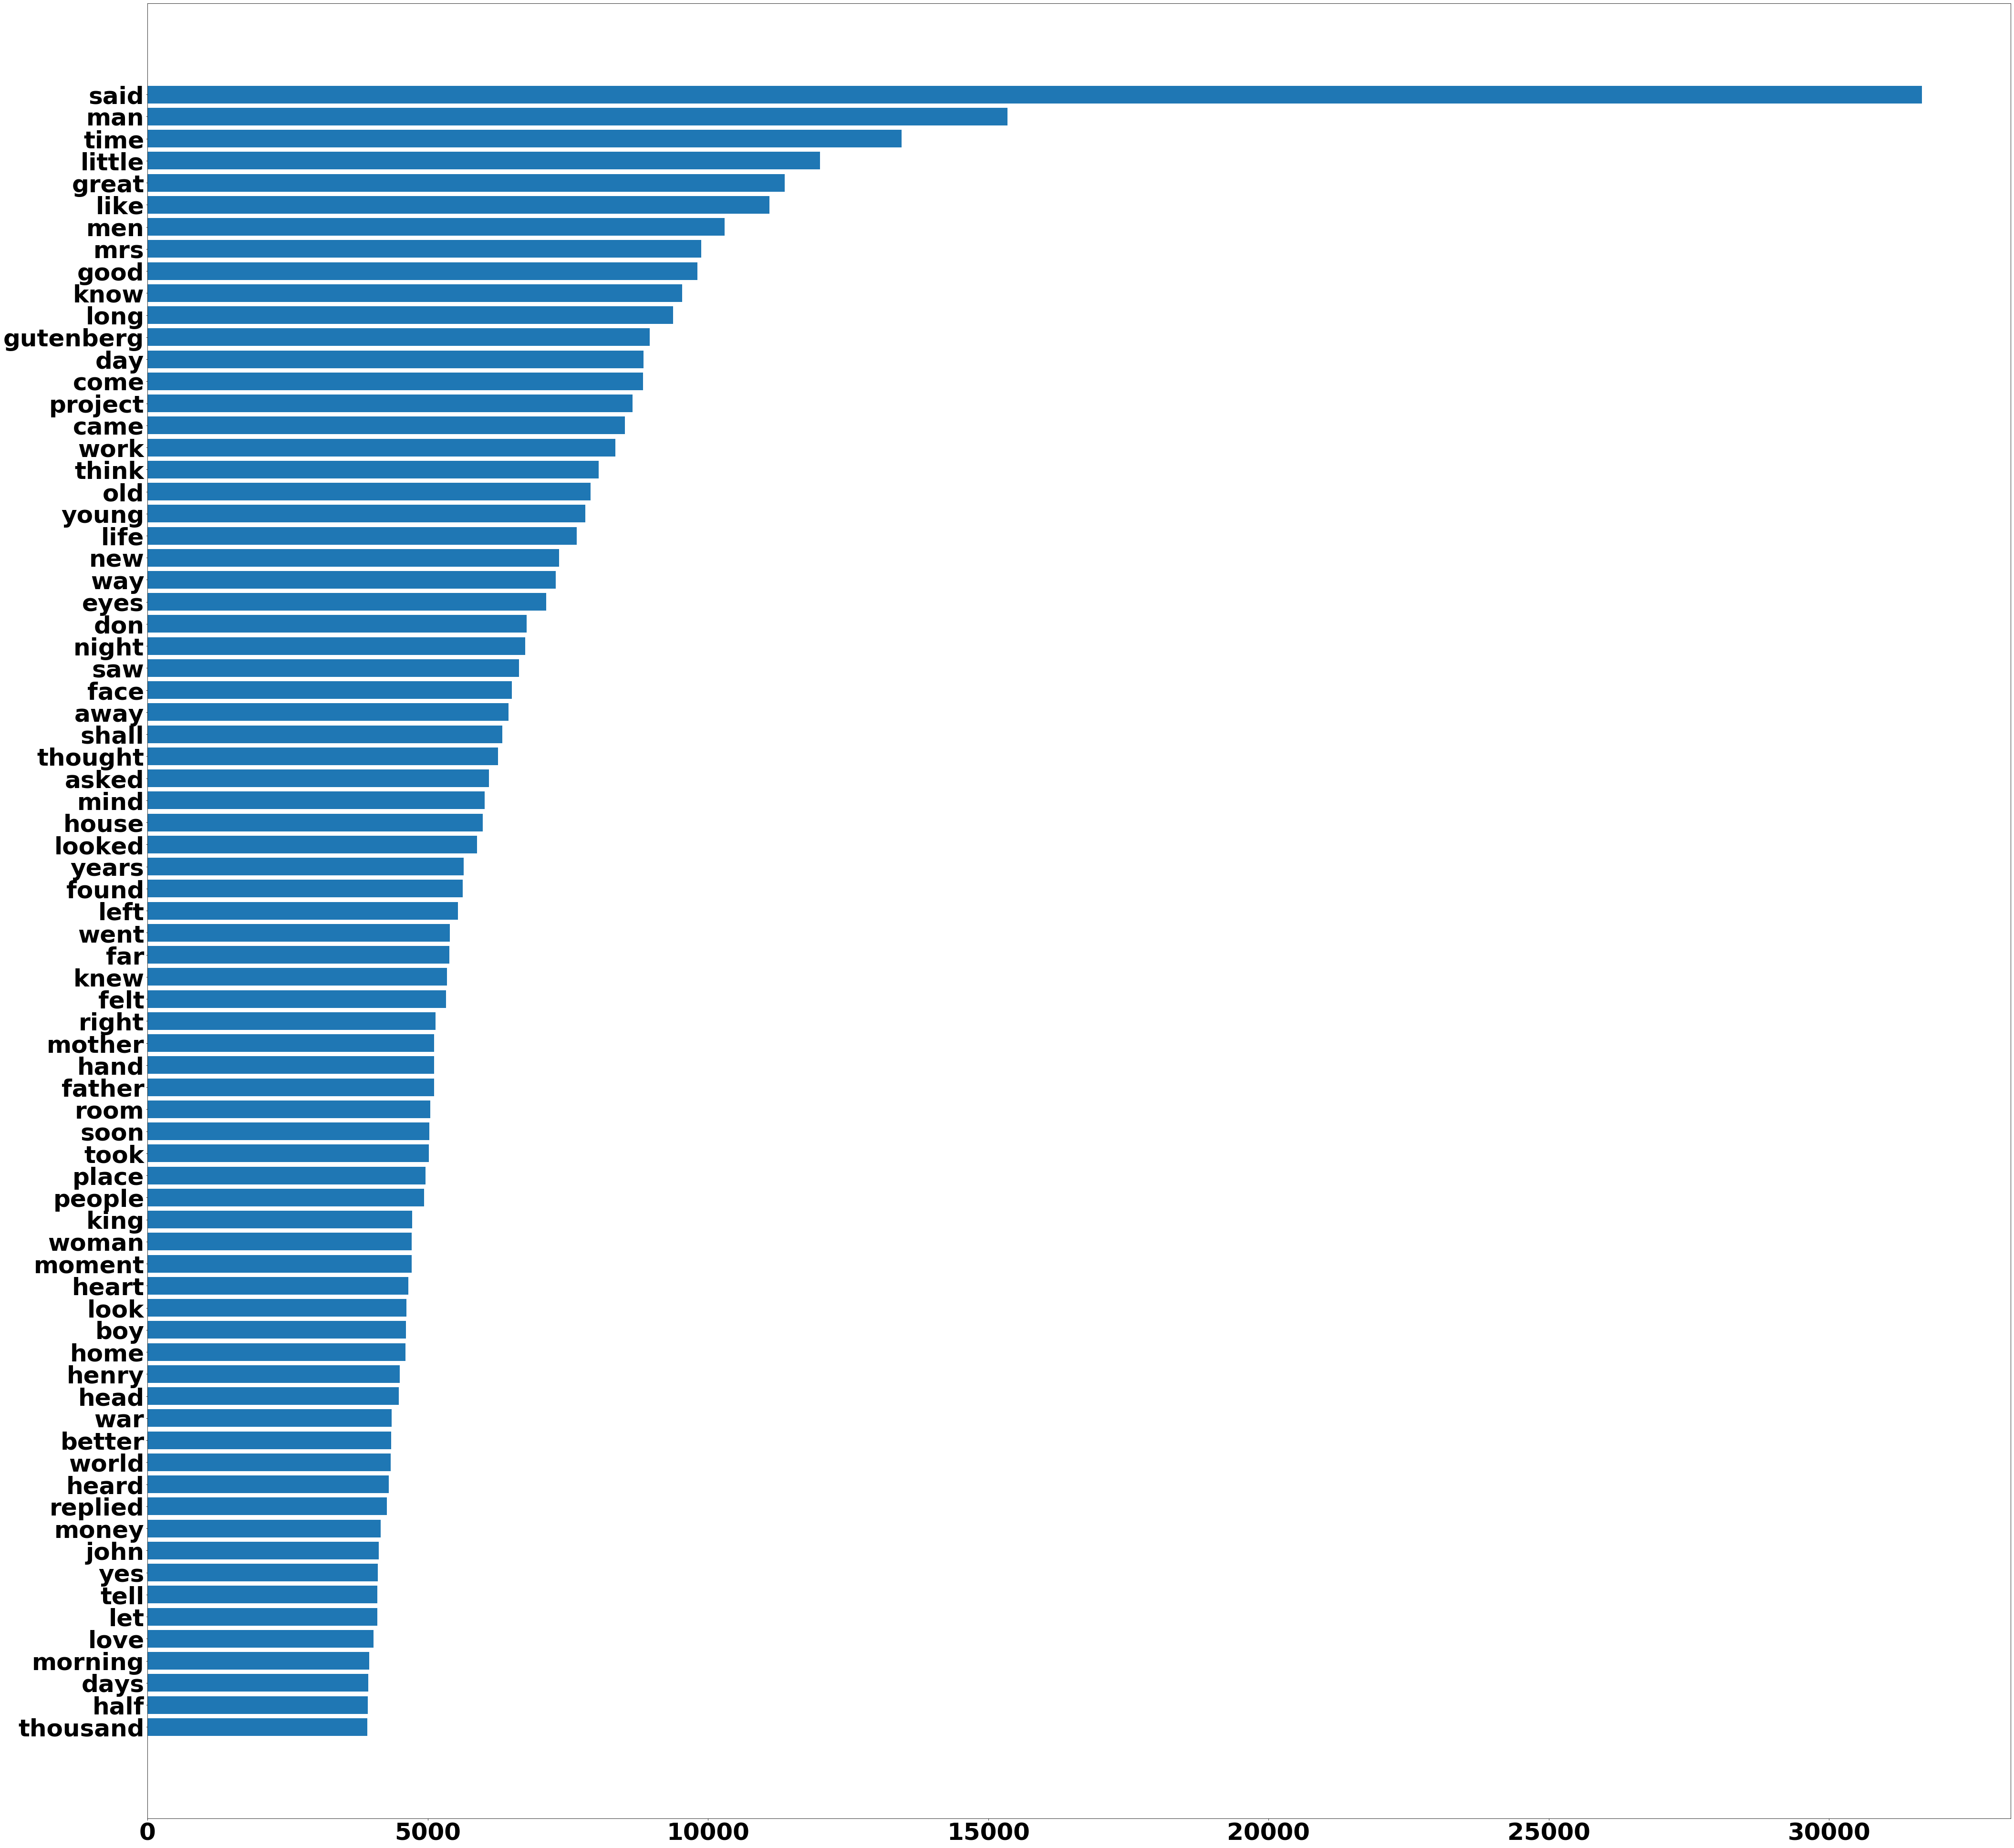

In [39]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Frequency plot of words in blogs with stopwords retained

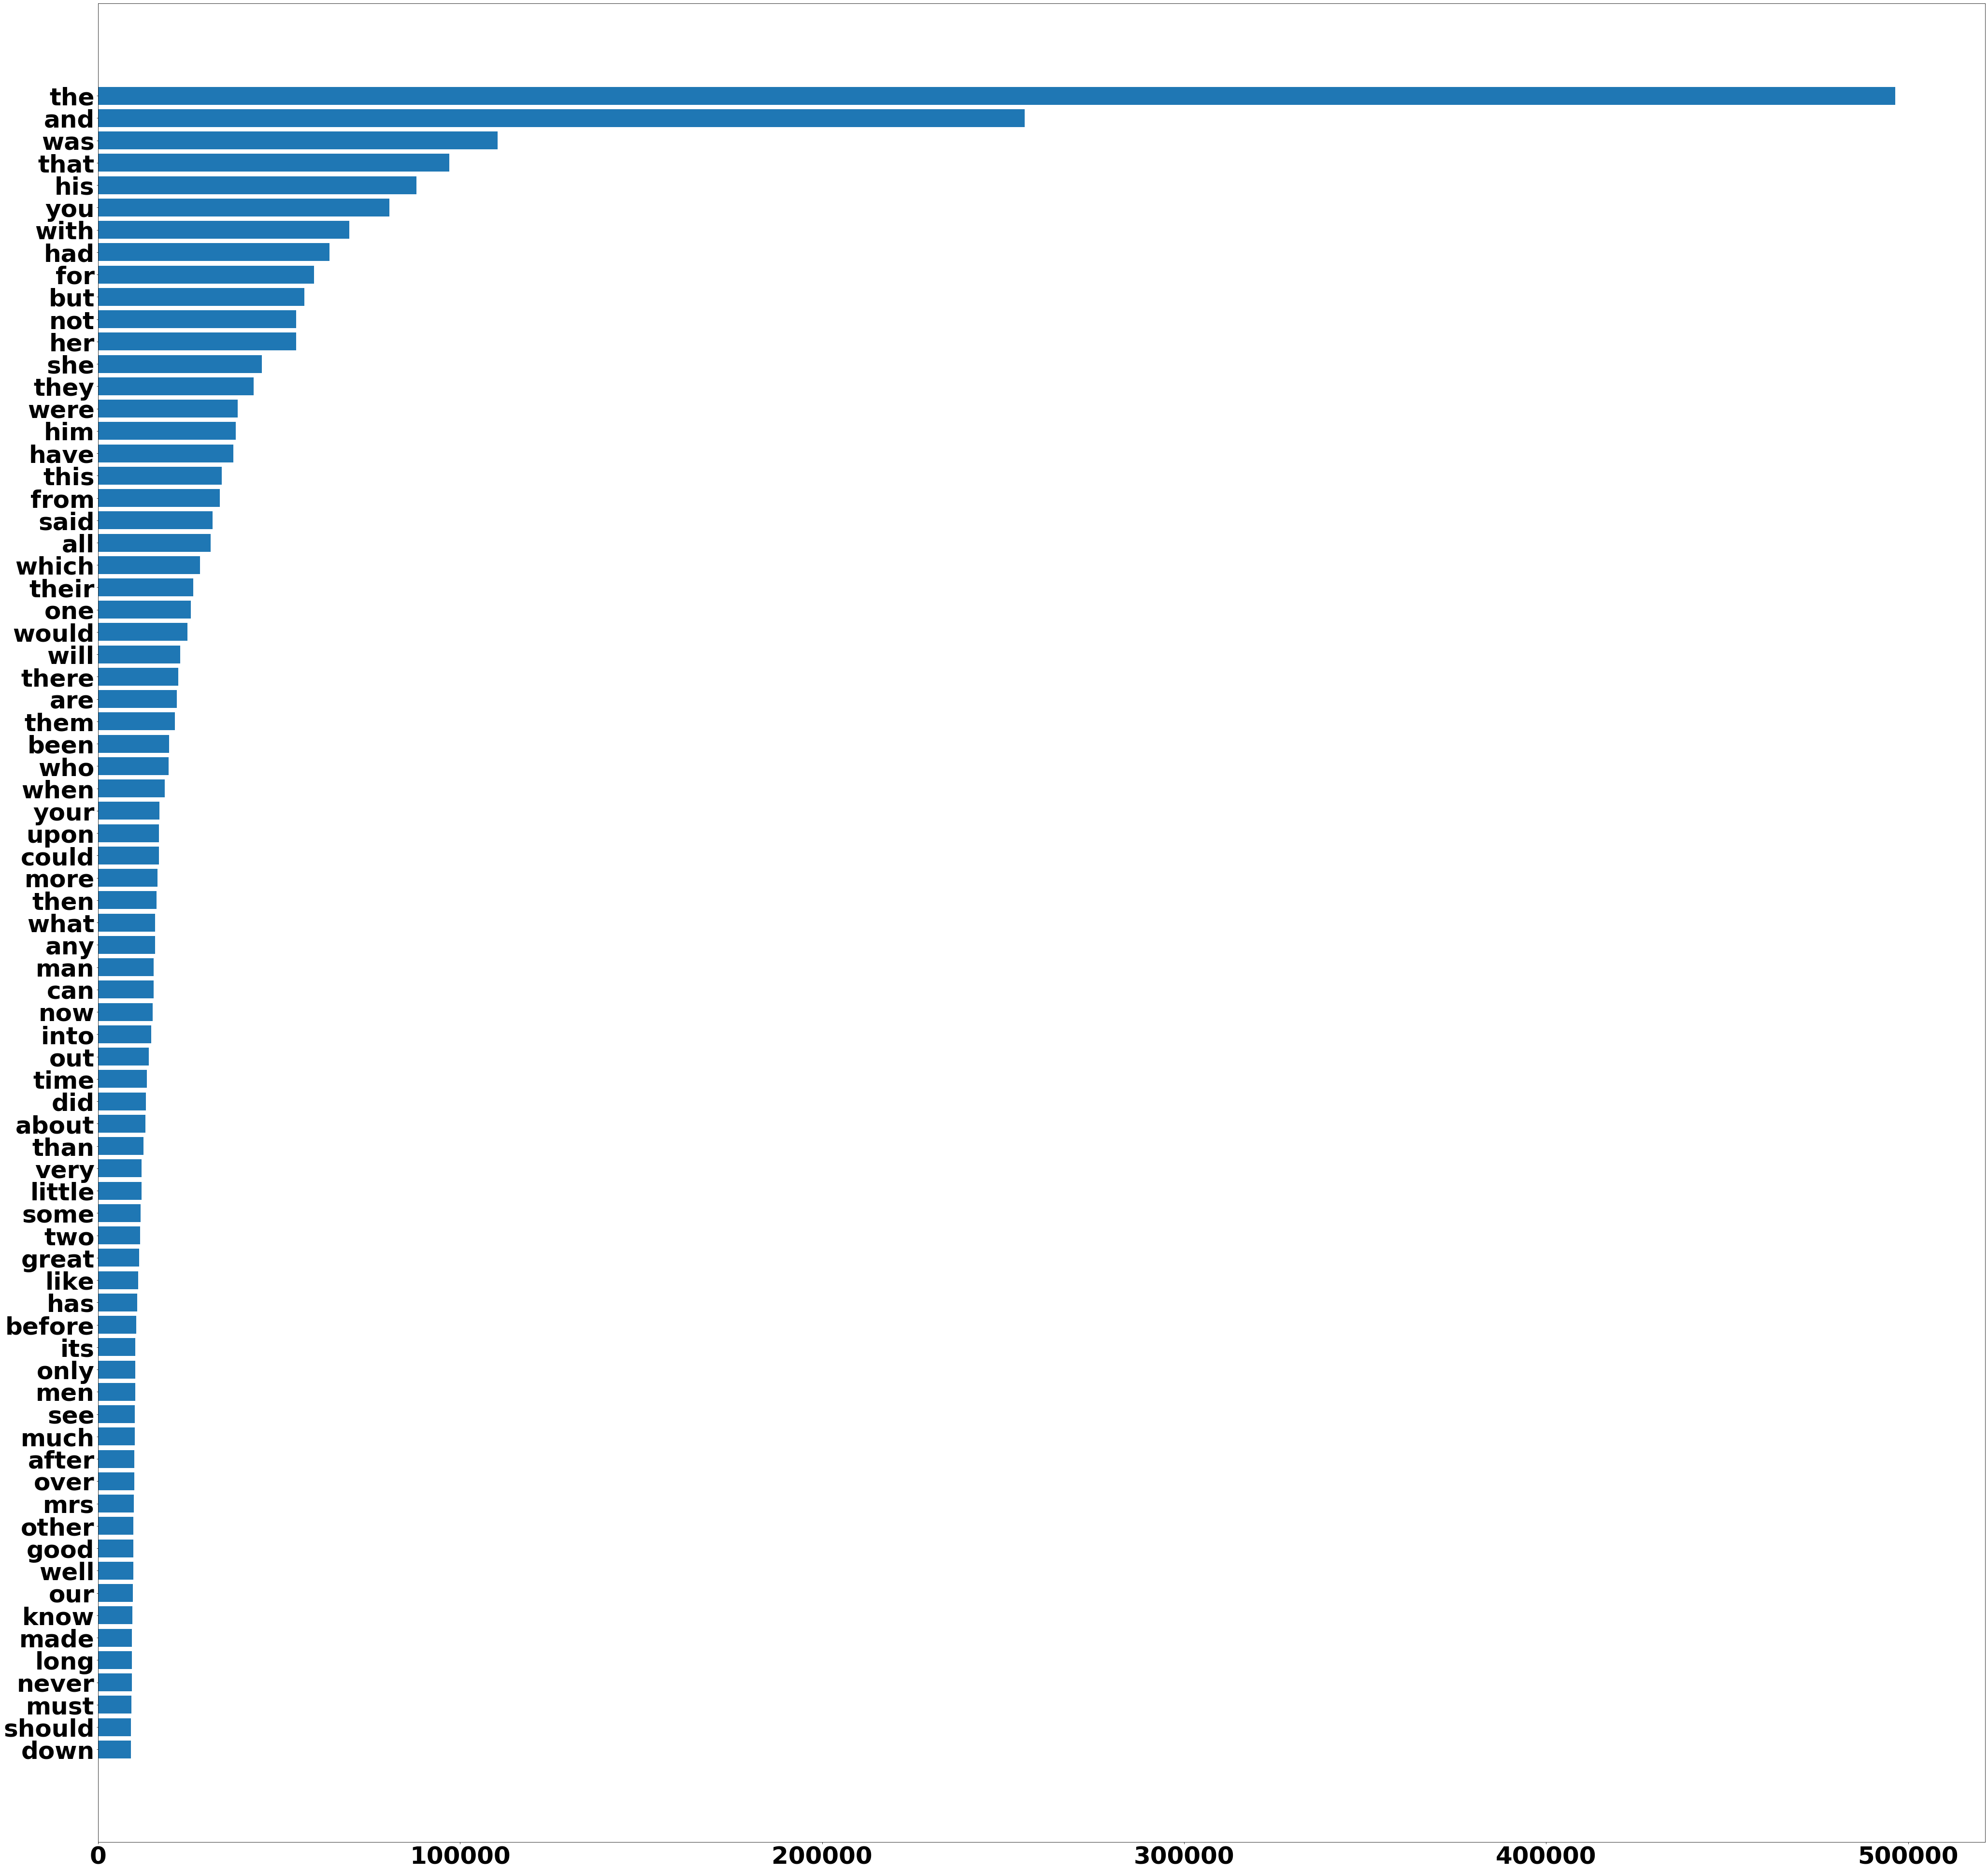

In [40]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

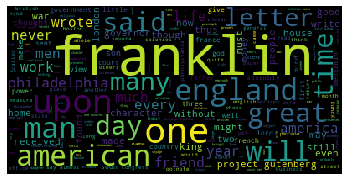

In [41]:
wordcloud = WordCloud().generate(data['clean_books'][1])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

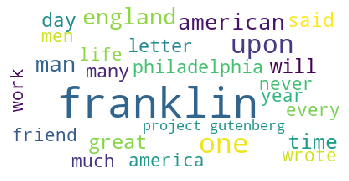

In [42]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['clean_books'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF

In [43]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]
data['clean_text_lemmatized'][0]

'project gutenberg ebook adventure chevalier salle companion exploration prairie forest lake river new world interview savage tribe year ago john abbott ebook use cost restriction whatsoever copy away use term project gutenberg license include ebook online www gutenberg org title adventure chevalier salle companion exploration prairie forest lake river new world interview savage tribe year ago author john abbott release date january ebook language english start project gutenberg ebook adventure chevalier salle produce mark orton google books online distribute proofreading canada team american pioneers patriot adventure chevalier salleand companion exploration prairie forest lake river new world interview savage tribe year ago john abbott new york dodd mead company publisher enter accord act congress year dodd mead office librarian congress washington inhabitant great valley west magnificent realm salle companion explore volume respectfully dedicate john abbott preface pioneer continent

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

print(tfidf_matrix.shape)

(100, 10518)


In [45]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['abandon', 'abandonment', 'abash', 'abate', 'abbott']

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib

In [53]:
%%time
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

Wall time: 11min 12s


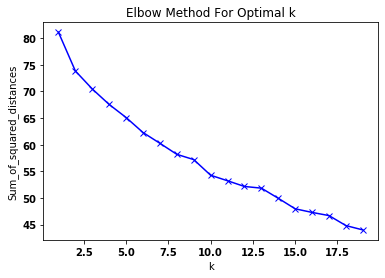

In [54]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
num_clusters = 12

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.00469717 0.00197882 0.00022974 ... 0.00932201 0.         0.00021521]
 [0.00736608 0.00308095 0.00138573 ... 0.00020395 0.00012907 0.00056527]
 [0.0045534  0.         0.00114772 ... 0.00246991 0.0012193  0.00222618]
 ...
 [0.00040929 0.         0.00165436 ... 0.00074257 0.00047896 0.        ]
 [0.00188965 0.00051477 0.00026678 ... 0.00229921 0.00056708 0.00226473]
 [0.00755176 0.00173909 0.00083822 ... 0.00160405 0.00054351 0.00201591]]


['doc_cluster_best_K.pkl']

### Getting the top words from each cluster

In [56]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.00469717 0.00197882 0.00022974 ... 0.00932201 0.         0.00021521]
 [0.00736608 0.00308095 0.00138573 ... 0.00020395 0.00012907 0.00056527]
 [0.0045534  0.         0.00114772 ... 0.00246991 0.0012193  0.00222618]
 ...
 [0.00040929 0.         0.00165436 ... 0.00074257 0.00047896 0.        ]
 [0.00188965 0.00051477 0.00026678 ... 0.00229921 0.00056708 0.00226473]
 [0.00755176 0.00173909 0.00083822 ... 0.00160405 0.00054351 0.00201591]]
(12, 10518)


In [57]:
km.cluster_centers_.argsort()

array([[ 5948,  8306,  8307, ...,  7794,  2288,  6155],
       [ 3271,  8353,  7389, ...,  2253,  4425,  6155],
       [ 8501,  1836,  6121, ...,  4801,  4179,  6693],
       ...,
       [10517,  6094,  6102, ...,  6155,  2288,  2253],
       [ 1853,  2245,  2246, ...,  1283,  4032,  2080],
       [ 8229,  5304,  9085, ...,  7029, 10026,  6155]], dtype=int64)

In [58]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[ 6155,  2288,  7794, ...,  8307,  8306,  5948],
       [ 6155,  4425,  2253, ...,  7389,  8353,  3271],
       [ 6693,  4179,  4801, ...,  6121,  1836,  8501],
       ...,
       [ 2253,  2288,  6155, ...,  6102,  6094, 10517],
       [ 2080,  4032,  1283, ...,  2246,  2245,  1853],
       [ 6155, 10026,  7029, ...,  9085,  5304,  8229]], dtype=int64)

In [59]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['mrs'],['don'],['san', 'francisco'],['san'],['california'],['francisco'],

Top words in Cluster-1 :

['mrs'],['husband'],['dollar'],['don'],['mary'],['say', 'mrs'],

Top words in Cluster-2 :

['paul'],['henry'],['jim'],['warrior'],['forest'],['rifle'],

Top words in Cluster-3 :

['indians'],['colonel'],['indian'],['fort'],['river'],['chapter'],

Top words in Cluster-4 :

['spaniard'],['van'],['pirate'],['captain'],['ship'],['vessel'],

Top words in Cluster-5 :

['robert'],['canoe'],['warrior'],['rifle'],['french'],['hunter'],

Top words in Cluster-6 :

['king'],['emperor'],['napoleon'],['france'],['army'],['prince'],

Top words in Cluster-7 :

['john'],['german'],['say', 'john'],['french'],['army'],['scott'],

Top words in Cluster-8 :

['andrew'],['thou'],['parent'],['don'],['priest'],['sin'],

Top words in Cluster-9 :

['dollar'],['don'],['mrs'],['uncle'],['frank'],['street'],

Top words in Cluster-10 :

['dick'],['harry'],['colonel'

In [60]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

,index,title,link,textlink,text,Author,clean_books,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group
0,0,The Adventures of the Chevalier De La Salle an...,NaN,https://www.gutenberg.org/ebooks/24400.txt.utf-8,The Project Gutenberg EBook of The Adventures ...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the adventures the...,69458,project gutenberg ebook adventur chevali sall ...,project gutenberg ebook adventure chevalier sa...,"[the, project, gutenberg, ebook, the, adventur...","[the, project, gutenberg, ebook, the, adventur...",3
1,1,Benjamin Franklin\rA Picture of the Struggles ...,NaN,https://www.gutenberg.org/ebooks/30406.txt.utf-8,The Project Gutenberg EBook of Benjamin Frankl...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook benjamin franklin ...,66179,project gutenberg ebook benjamin franklin pict...,project gutenberg ebook benjamin franklin pict...,"[the, project, gutenberg, ebook, benjamin, fra...","[the, project, gutenberg, ebook, benjamin, fra...",11
2,2,Captain William Kidd and Others of the Buccaneers,NaN,https://www.gutenberg.org/files/50550/50550-0.txt,"The Project Gutenberg eBook, Captain William K...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook captain william ki...,67865,project gutenberg ebook captain william kidd b...,project gutenberg ebook captain william kidd b...,"[the, project, gutenberg, ebook, captain, will...","[the, project, gutenberg, ebook, captain, will...",4
3,3,The Child at Home: The Principles of Filial Du...,NaN,https://www.gutenberg.org/ebooks/18533.txt.utf-8,The Project Gutenberg EBook of The Child at Ho...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the child home joh...,36466,project gutenberg ebook child home john abbott...,project gutenberg ebook child home john abbott...,"[the, project, gutenberg, ebook, the, child, h...","[the, project, gutenberg, ebook, the, child, h...",8
4,4,"Christopher Carson, Familiarly Known as Kit Ca...",NaN,https://www.gutenberg.org/ebooks/14243.txt.utf-8,"The Project Gutenberg eBook, Christopher Carso...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook christopher carson...,63723,project gutenberg ebook christoph carson john ...,project gutenberg ebook christopher carson joh...,"[the, project, gutenberg, ebook, christoph, ca...","[the, project, gutenberg, ebook, christopher, ...",3
5,5,Columbus: De ontdekker van Amerika,NaN,https://www.gutenberg.org/ebooks/18066.txt.utf-8,"The Project Gutenberg EBook of Columbus, by J....","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook columbus abbott th...,56525,project gutenberg ebook columbus abbott ebook ...,project gutenberg ebook columbus abbott ebook ...,"[the, project, gutenberg, ebook, columbus, abb...","[the, project, gutenberg, ebook, columbus, abb...",4


In [61]:
data.keys()

dict_keys(['index', 'title', 'link', 'textlink', 'text', 'Author', 'clean_books', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [62]:
cluster_df = pd.DataFrame(data)
cluster_df['cluster_group'].value_counts()

1     19
11    16
9     14
6      8
3      8
0      7
4      6
2      6
10     4
8      4
7      4
5      4
Name: cluster_group, dtype: int64

## Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [63]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [64]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [65]:
from itertools import chain
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)
    
frequent_words_df.head()

,cluster_id,values,counts
0,0,"[man, know, time, like, woman, say, look, come...","[1970, 1736, 1551, 1527, 1364, 1311, 1293, 125..."
1,1,"[say, mrs, man, come, know, time, look, good, ...","[6751, 5339, 3981, 3959, 3150, 3052, 2956, 284..."
2,2,"[say, henry, paul, come, man, long, great, kno...","[3389, 3188, 2586, 2255, 1513, 1459, 1455, 144..."
3,3,"[man, indians, say, come, great, day, river, f...","[2117, 1373, 1282, 1173, 1068, 1028, 988, 949,..."
4,4,"[van, man, het, een, say, hij, die, dat, meet,...","[2095, 1806, 1735, 1470, 1077, 1061, 970, 855,..."


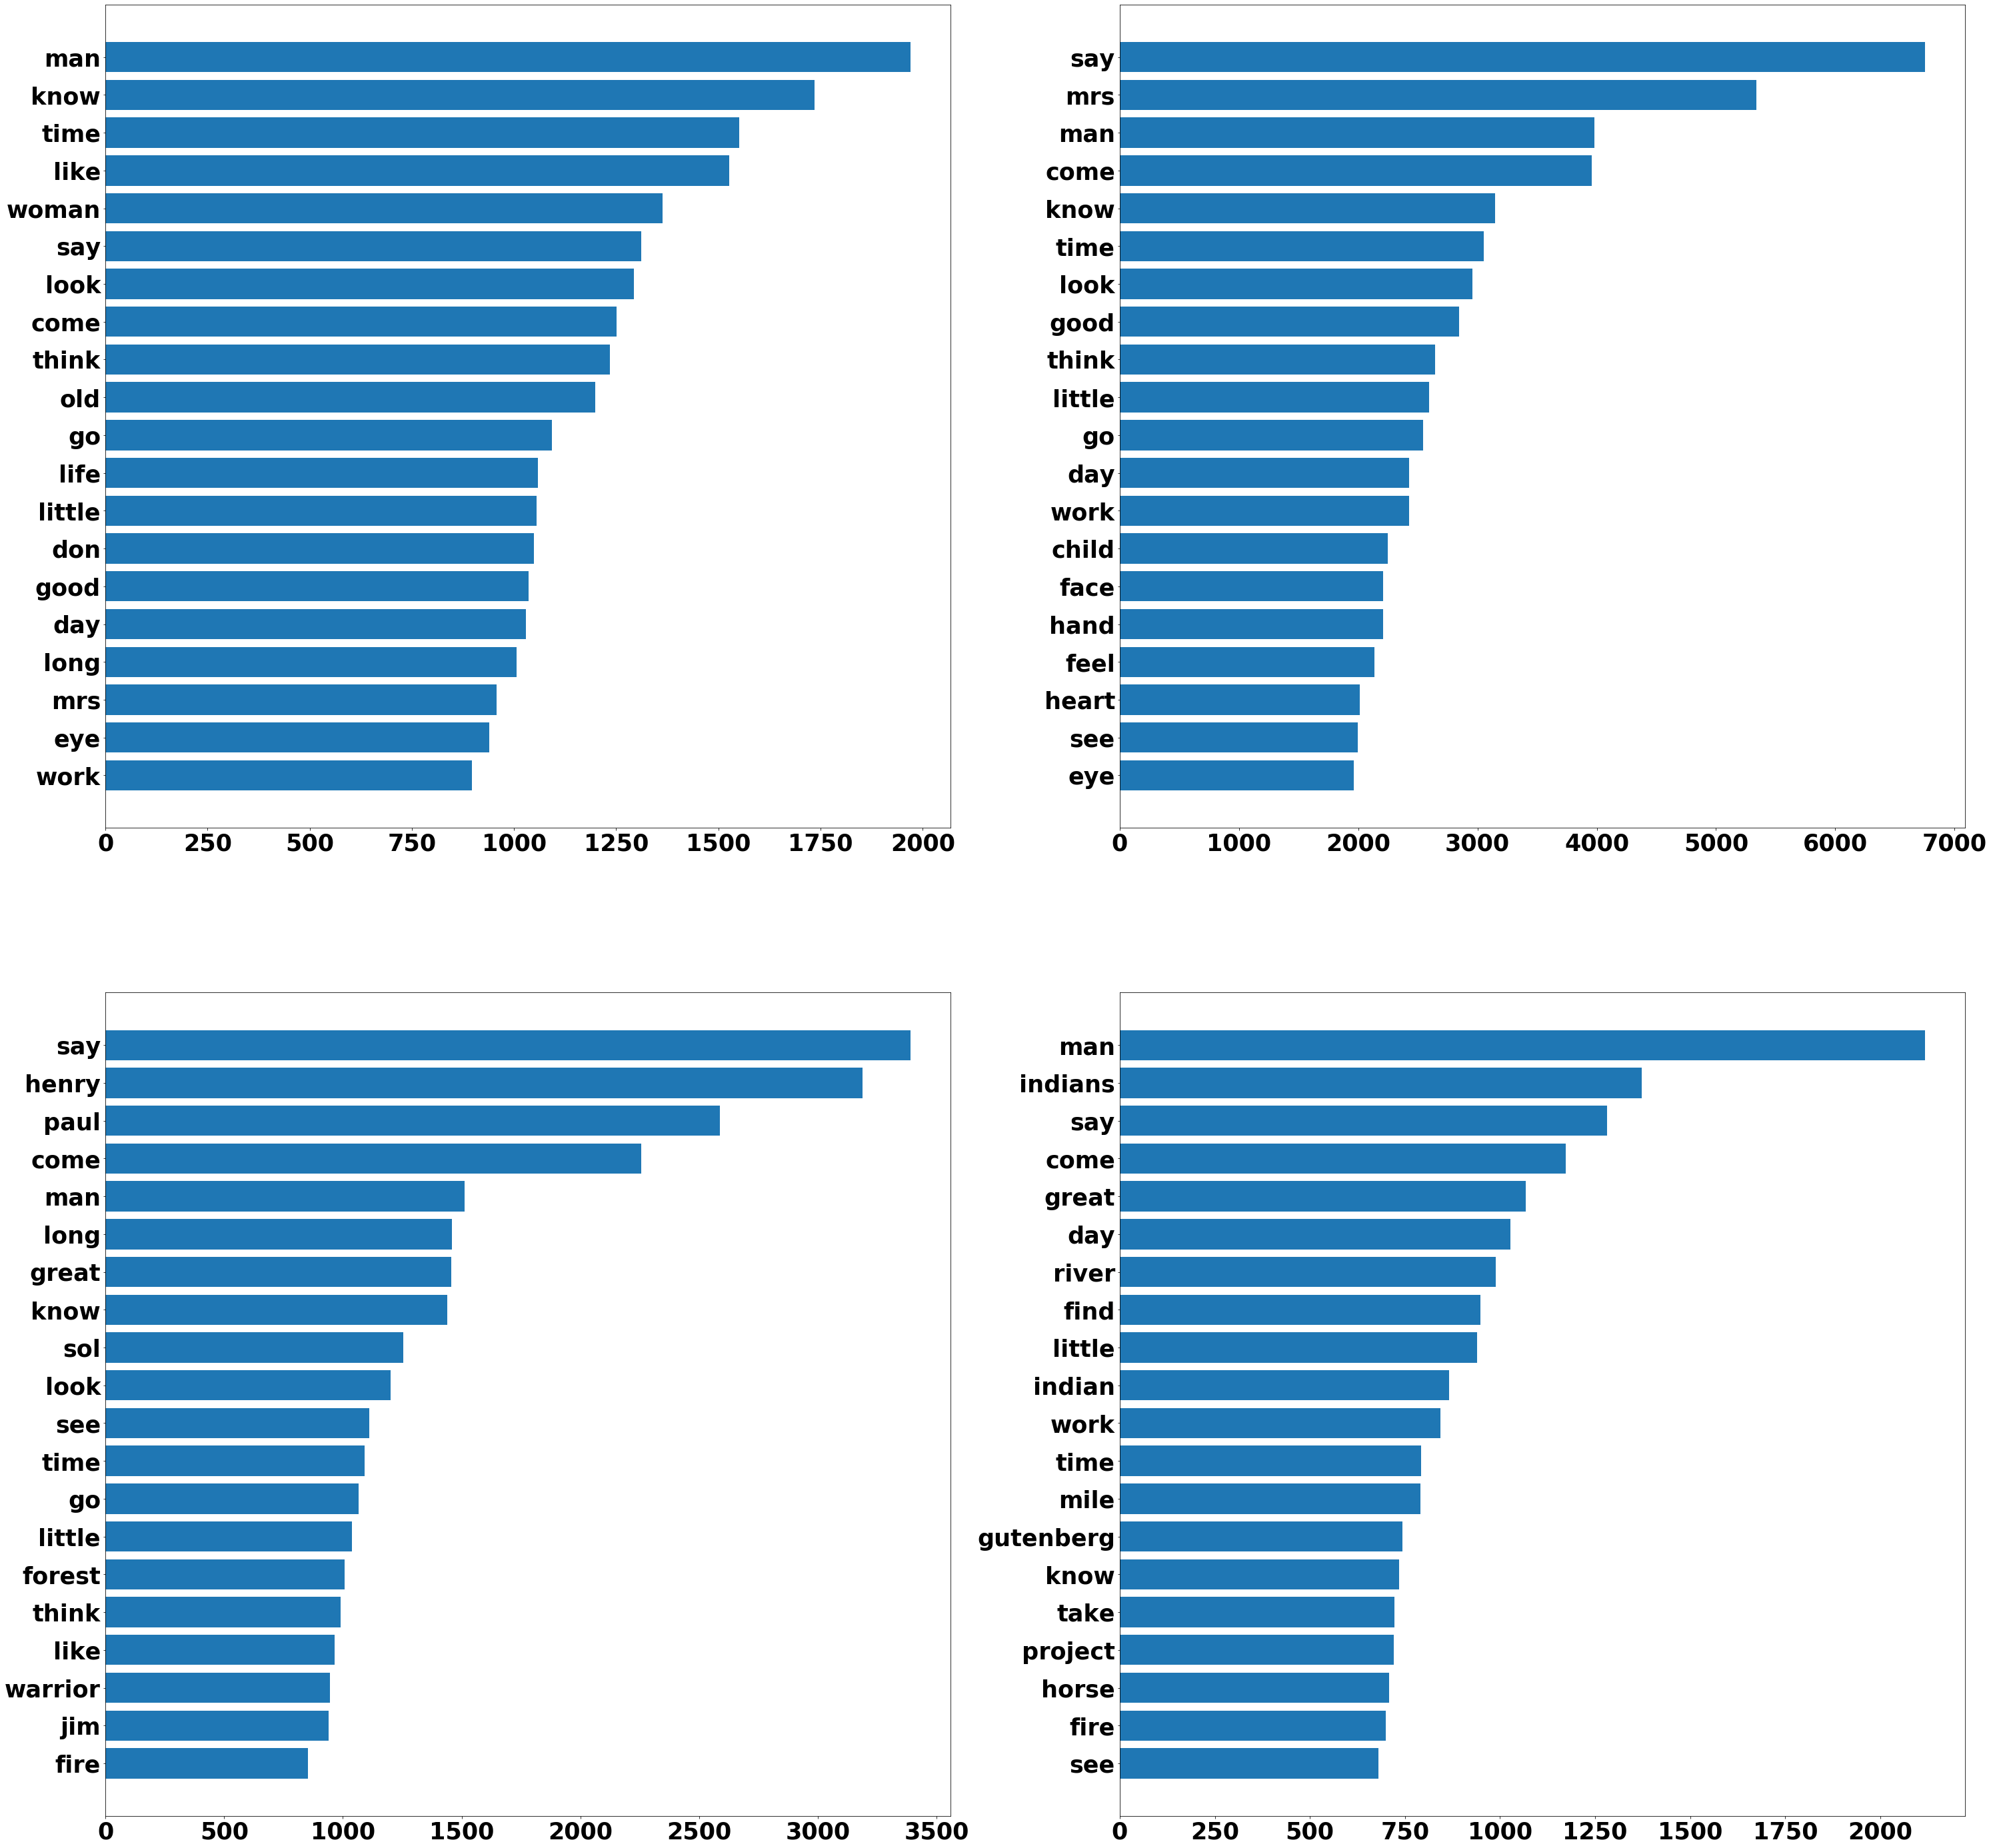

In [66]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

In [75]:
%%time
from sklearn.decomposition import TruncatedSVD

n_components = 35

svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

Wall time: 1.77 s


TruncatedSVD(algorithm='randomized', n_components=35, n_iter=20,
             random_state=143, tol=0.0)

In [76]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"\nTotal Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"\nThe singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.03626457 0.08945105 0.05217193 0.04244027 0.04026874 0.03424673
 0.03200381 0.03034801 0.02458657 0.02105181 0.02031231 0.01944809
 0.01903954 0.01595016 0.01509593 0.01458233 0.01450042 0.01408146
 0.01335331 0.01324962 0.01302629 0.0123165  0.01211705 0.01192851
 0.01170626 0.01130095 0.01113975 0.01082317 0.01057551 0.01029894
 0.01021348 0.00969376 0.00960191 0.00938502 0.00914605]

Total Explained Variance : 72.57 %

The singular values are [4.59667376 2.80595917 2.05704877 1.85575877 1.81706972 1.66708833
 1.61114229 1.57038488 1.41300201 1.30852426 1.28392339 1.25593247
 1.24305017 1.14078176 1.10661319 1.08765462 1.08446188 1.06892777
 1.04234835 1.03664156 1.02833964 1.00339213 0.99145069 0.98422612
 0.97714642 0.95736815 0.95063784 0.93707644 0.92613223 0.9140231
 0.91083433 0.88668189 0.88250728 0.87253804 0.86156805]


### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [77]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.01290781 0.00349061 0.00187568 ... 0.00600263 0.00127413 0.0017793 ] and shape is (10518,)
Topic 0: 
mrs -- 0.5112325587404429
don -- 0.2217560845021269
dollar -- 0.1623219750157956
husband -- 0.11870026747265588
john -- 0.08668771949197733
street -- 0.08565385319240751
 
The component is [ 0.01412487  0.00038003 -0.00040064 ...  0.01113869  0.00315465
  0.00259253] and shape is (10518,)
Topic 1: 
indians -- 0.21343935411623413
henry -- 0.16791942060966303
warrior -- 0.1616403285490427
army -- 0.15725234573734942
rifle -- 0.14742159919450504
robert -- 0.14615754341112172
 
The component is [-0.00984783 -0.00103617  0.00092764 ... -0.0073684  -0.00211319
  0.0008402 ] and shape is (10518,)
Topic 2: 
henry -- 0.28965832270802777
paul -- 0.27222242884670667
robert -- 0.19946912617857923
warrior -- 0.18142740357014453
rifle -- 0.14403543183810846
jim -- 0.13912056100696593
 
The component is [-0.0150966  -0.00374778  0.00076063 ...  0.00053085 -0.00287785
 -0.00014665] 

  0.00082719] and shape is (10518,)
Topic 26: 
candidate -- 0.23537079158018437
king -- 0.17742935993918213
paul -- 0.17309488683477575
dollar -- 0.16797844702339443
squire -- 0.14794723983457556
president -- 0.11301069171775159
 
The component is [-0.00728012 -0.00265865  0.00069255 ...  0.01252667 -0.00085585
  0.00057692] and shape is (10518,)
Topic 27: 
parent -- 0.2231338291539292
frank -- 0.16926016529396518
sin -- 0.14724078380818384
san francisco -- 0.14445744778466796
francisco -- 0.13897192161514096
san -- 0.13209173866710894
 
The component is [-0.00728675  0.00136552 -0.00480541 ... -0.00477016  0.00164577
  0.00051053] and shape is (10518,)
Topic 28: 
thou -- 0.2730144667150102
henry -- 0.17595511275853298
california -- 0.16980677456338053
president -- 0.13996834660260968
squire -- 0.13596322466698263
thy -- 0.11678641619264235
 
The component is [ 0.0041223  -0.00083838  0.00550551 ... -0.0030909  -0.00427991
  0.00198836] and shape is (10518,)
Topic 29: 
frank -- 0.31159

### Tagging each document with a topic

In [78]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print("\nDoc Topic Matrix: \n",doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print("\nSVD Categories: \n",svd_categories)


Doc Topic Matrix: 
 [[ 0.28278408  0.51890617  0.15187431 ... -0.10411883  0.03717147
  -0.05843418]
 [ 0.17936312  0.13507258 -0.14259919 ... -0.12544467  0.26253181
   0.04444986]
 [ 0.22716616  0.27607373 -0.074234   ...  0.00758651 -0.11044562
   0.01016427]
 ...
 [ 0.45036619  0.0165891  -0.13635302 ... -0.25989566  0.14313767
   0.10759548]
 [ 0.71239155 -0.02389448 -0.20509934 ...  0.03610912 -0.02610148
   0.03027646]
 [ 0.60751499 -0.15501638 -0.12761189 ... -0.04601003  0.0175669
   0.01978157]]

SVD Categories: 
 [ 1 18 12 27  1 21  1  1  1  1  1  1  1  1  1 13  1 17  1 17  0  0 14  0
  0  0  0  0  0  0  0 24 11  0  7 29  0  0  0  0  0  1  0  2  6  2  1  1
 11  6  8  6  5  0  2  8 17  1  5  1  0  0  0  0  0  0  0  0  0 15  9  0
  0  0  0  0 16 34  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0 33
  0  0  0  0]


In [79]:
data['SVD_group'] = svd_categories
pd.DataFrame(data).head(6)

,index,title,link,textlink,text,Author,clean_books,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group,SVD_group
0,0,The Adventures of the Chevalier De La Salle an...,NaN,https://www.gutenberg.org/ebooks/24400.txt.utf-8,The Project Gutenberg EBook of The Adventures ...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the adventures the...,69458,project gutenberg ebook adventur chevali sall ...,project gutenberg ebook adventure chevalier sa...,"[the, project, gutenberg, ebook, the, adventur...","[the, project, gutenberg, ebook, the, adventur...",3,1
1,1,Benjamin Franklin\rA Picture of the Struggles ...,NaN,https://www.gutenberg.org/ebooks/30406.txt.utf-8,The Project Gutenberg EBook of Benjamin Frankl...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook benjamin franklin ...,66179,project gutenberg ebook benjamin franklin pict...,project gutenberg ebook benjamin franklin pict...,"[the, project, gutenberg, ebook, benjamin, fra...","[the, project, gutenberg, ebook, benjamin, fra...",11,18
2,2,Captain William Kidd and Others of the Buccaneers,NaN,https://www.gutenberg.org/files/50550/50550-0.txt,"The Project Gutenberg eBook, Captain William K...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook captain william ki...,67865,project gutenberg ebook captain william kidd b...,project gutenberg ebook captain william kidd b...,"[the, project, gutenberg, ebook, captain, will...","[the, project, gutenberg, ebook, captain, will...",4,12
3,3,The Child at Home: The Principles of Filial Du...,NaN,https://www.gutenberg.org/ebooks/18533.txt.utf-8,The Project Gutenberg EBook of The Child at Ho...,"Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook the child home joh...,36466,project gutenberg ebook child home john abbott...,project gutenberg ebook child home john abbott...,"[the, project, gutenberg, ebook, the, child, h...","[the, project, gutenberg, ebook, the, child, h...",8,27
4,4,"Christopher Carson, Familiarly Known as Kit Ca...",NaN,https://www.gutenberg.org/ebooks/14243.txt.utf-8,"The Project Gutenberg eBook, Christopher Carso...","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook christopher carson...,63723,project gutenberg ebook christoph carson john ...,project gutenberg ebook christopher carson joh...,"[the, project, gutenberg, ebook, christoph, ca...","[the, project, gutenberg, ebook, christopher, ...",3,1
5,5,Columbus: De ontdekker van Amerika,NaN,https://www.gutenberg.org/ebooks/18066.txt.utf-8,"The Project Gutenberg EBook of Columbus, by J....","Abbott, John S. C. (John Stevens Cabot), 1805-...",the project gutenberg ebook columbus abbott th...,56525,project gutenberg ebook columbus abbott ebook ...,project gutenberg ebook columbus abbott ebook ...,"[the, project, gutenberg, ebook, columbus, abb...","[the, project, gutenberg, ebook, columbus, abb...",4,21


#### Clustering the Document-Topic matrix

In [80]:
%%time
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

Wall time: 1.37 s


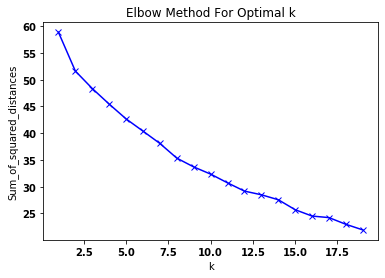

In [81]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [82]:
num_clusters = 12

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

the cluster centers are [[ 6.57839070e-01 -2.96741065e-01  6.99338582e-02 -1.91800874e-01
  -3.25067687e-02  7.73494762e-02  2.45393342e-02 -5.46869649e-02
   3.77125458e-03  1.89325814e-02 -2.80692261e-02  1.46405413e-02
   5.72117564e-03 -1.29154389e-02  1.07987838e-02  1.02387458e-02
  -8.52936632e-03 -5.76729274e-03 -4.58636397e-03 -1.61419272e-03
  -1.75082840e-02 -3.04432804e-03 -7.83722296e-03 -9.68474442e-03
   6.36311620e-03  8.12947202e-03  1.41483227e-02 -5.52507569e-03
   2.24301145e-02 -1.40340925e-02 -2.25690596e-03  2.96148311e-03
  -5.60260481e-03  9.56235811e-04 -8.01964571e-03]
 [ 3.08081187e-01  3.92482882e-01  4.99573473e-02 -1.49913312e-02
  -3.68557894e-02  1.10419745e-01 -1.50356607e-01 -1.37270286e-01
   8.00818550e-03 -7.53022735e-02  7.31084171e-03  7.32339697e-03
   1.03156984e-02 -3.58463059e-02  3.23603544e-02 -5.36281111e-02
  -6.78141961e-03  4.66789590e-02 -1.29972865e-02 -9.77882869e-03
   1.65986351e-03  7.59963522e-02 -8.86316945e-03 -4.73044257e-03
 

['doc_topic_cluster_best_K.pkl']

In [83]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [84]:
doc_cluster_df = pd.DataFrame(data)
doc_cluster_df['doc_topic_cluster_group'].value_counts()

0     18
5     16
1     13
10    12
2     12
6      9
4      6
3      4
8      3
7      3
11     2
9      2
Name: doc_topic_cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [85]:
##Step 1
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['clean_text_lemmatized']]

In [86]:
##Step 2
grouped_text = doc_cluster_df.groupby('doc_topic_cluster_group')['tokenized_text']

In [87]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [88]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [89]:
frequent_words_df.head()

,cluster_id,values,counts
0,0,"[say, mrs, come, man, know, time, look, good, ...","[5887, 5166, 3786, 3723, 2922, 2902, 2777, 270..."
1,1,"[man, say, come, van, great, know, het, day, l...","[4033, 3651, 2590, 2102, 1914, 1800, 1735, 168..."
2,2,"[say, man, come, know, work, time, think, good...","[3513, 2688, 1738, 1713, 1576, 1488, 1477, 125..."
3,3,"[say, robert, tayoga, come, great, know, man, ...","[2241, 2176, 1374, 1217, 1154, 1078, 766, 737,..."
4,4,"[say, henry, paul, come, man, long, great, kno...","[3389, 3188, 2586, 2255, 1513, 1459, 1455, 144..."


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


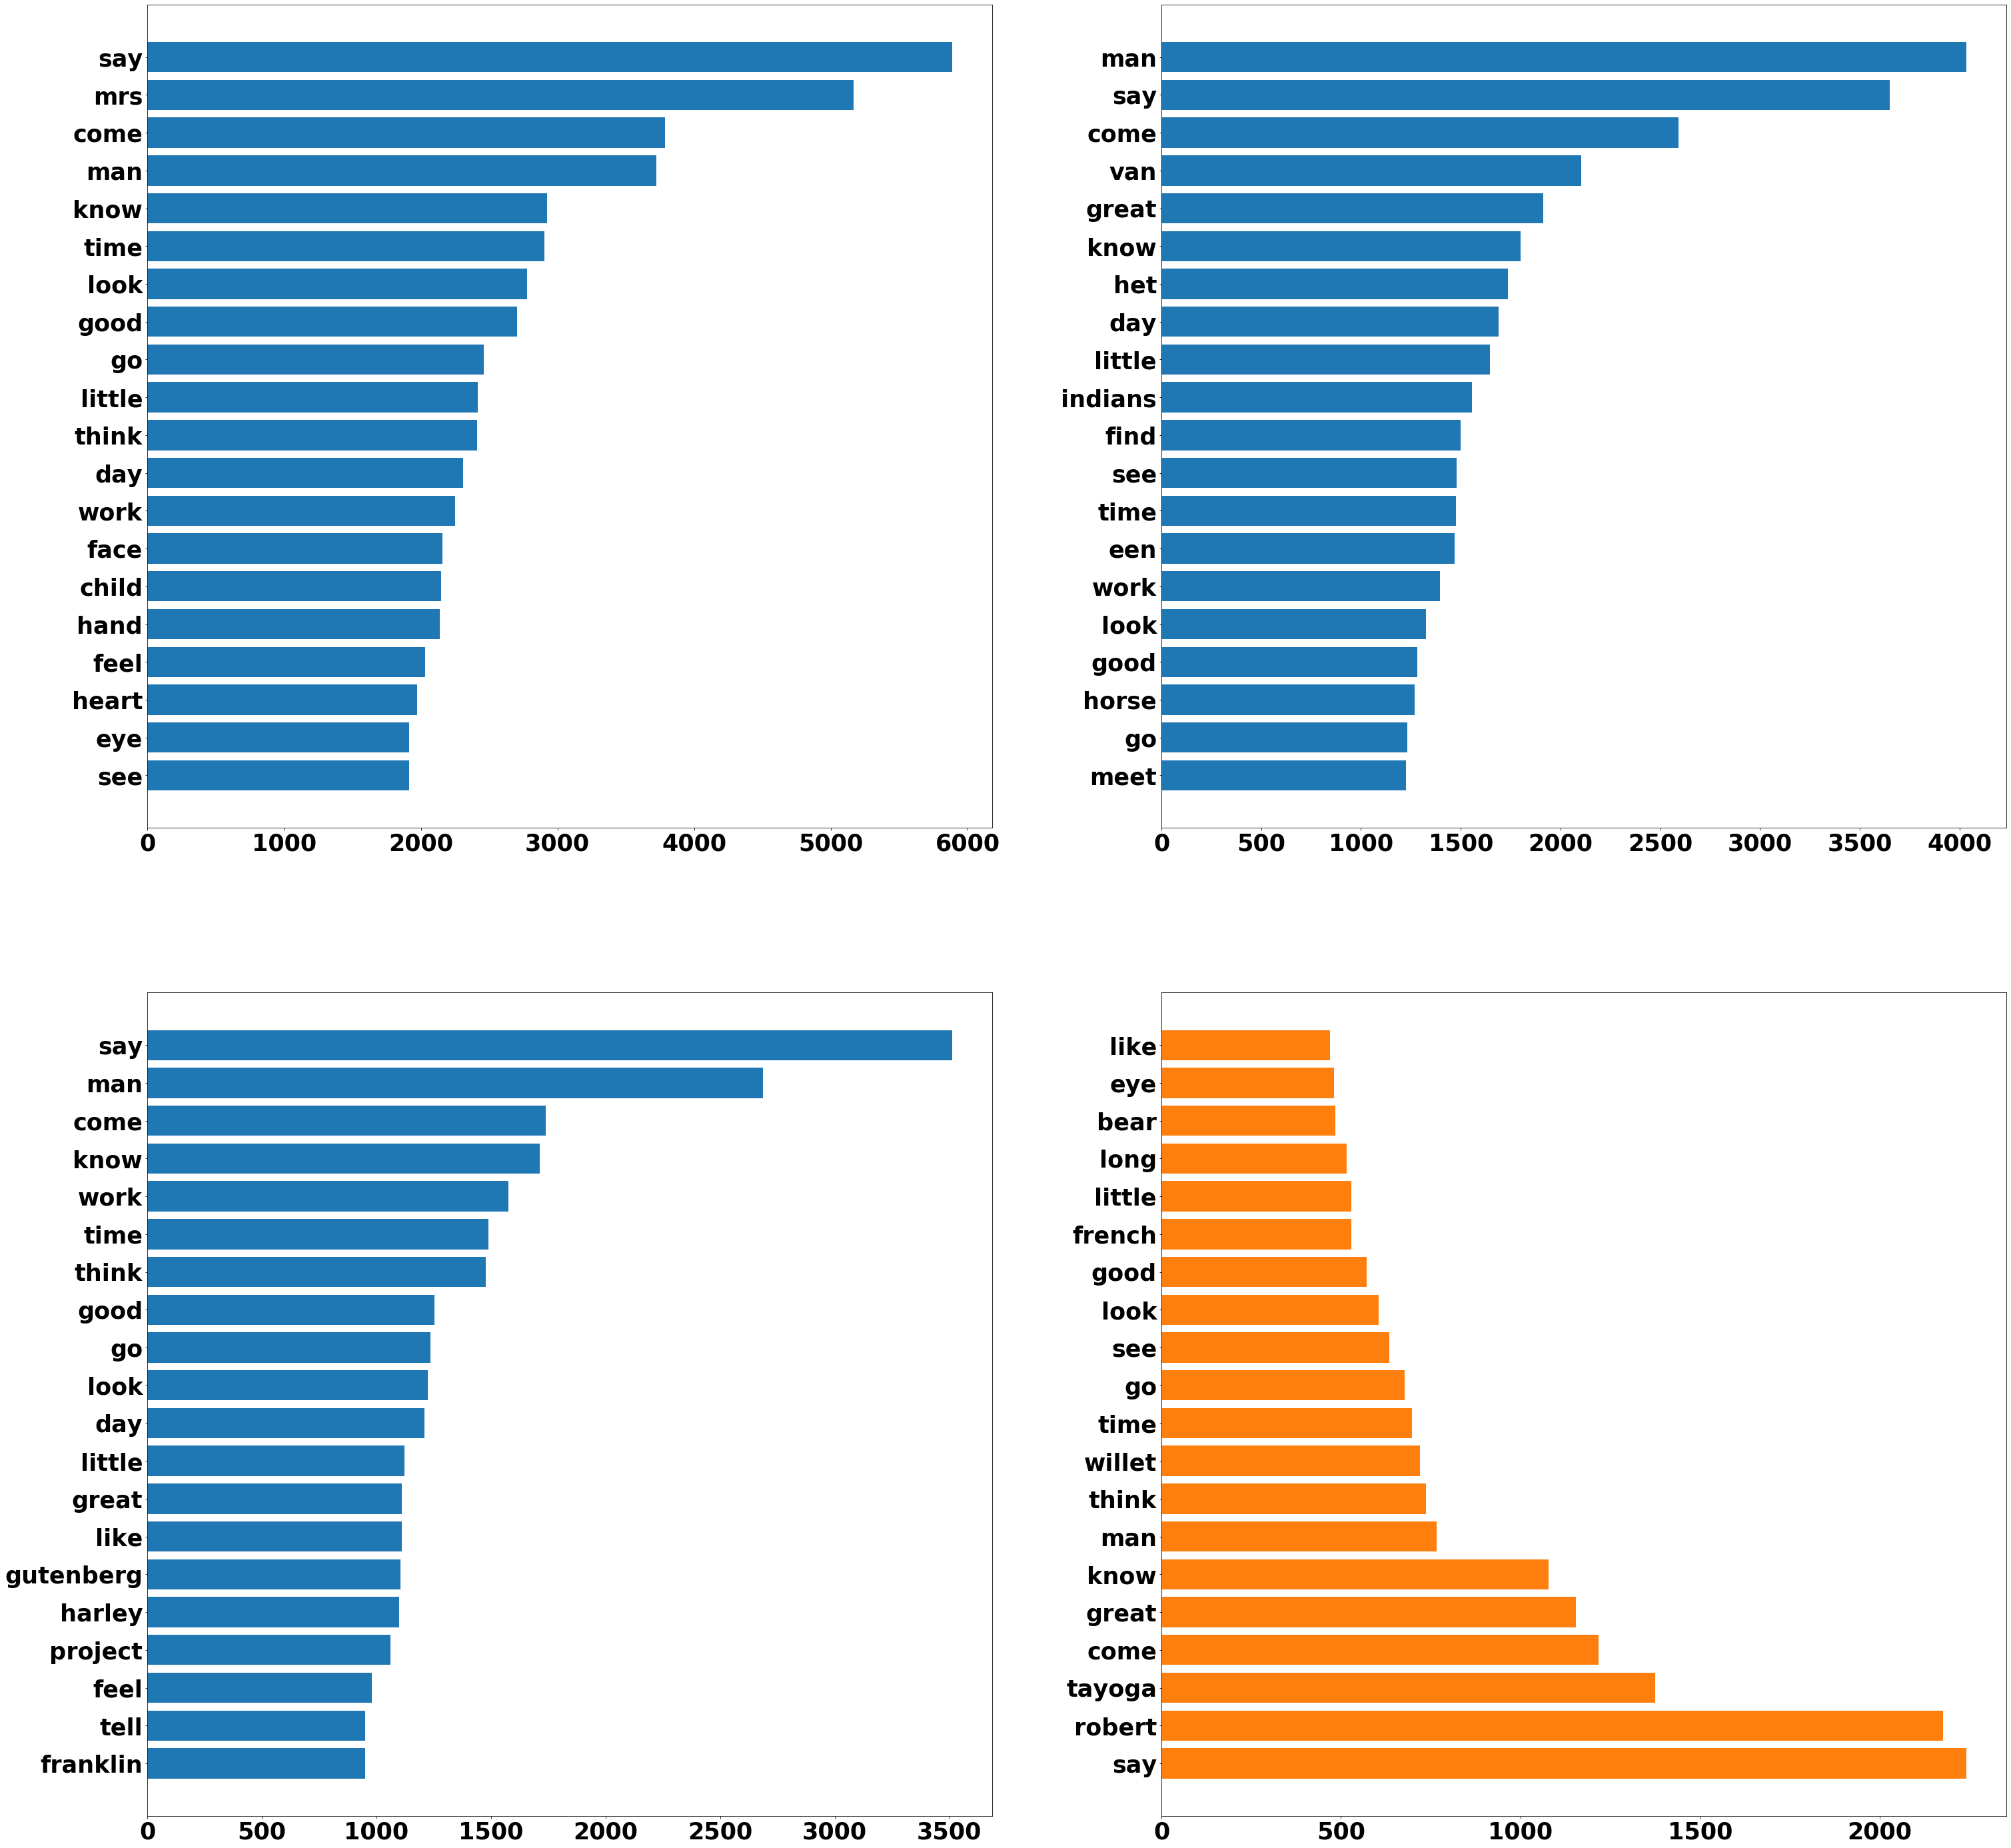

In [90]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()
plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

## Observations

We can notice that with document topic matrix (with just 26 components) we were able to achieve similar results when compared to tfidf matrix. 